Installing scikit-learn-extra for KMedoids

In [ ]:
pip install scikit-learn-extra

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import matplotlib.pyplot as plt
from math import sqrt
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

Import CSV

In [ ]:
df = pd.read_csv('stdData 1.csv')

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,1.221400,128.101200,80.035036,35.431417,180.956968,42.944951,1.320305,-0.779046
1,2.609743,85.891549,58.543681,14.454311,52.545356,33.426070,-0.786571,-1.656509
2,2.682163,99.782456,68.000884,26.339627,71.578043,37.542894,0.534953,-3.394990
3,3.196969,115.189168,65.307845,-0.539337,0.269863,20.857287,0.562433,-0.534598
4,4.790932,144.487763,80.800220,18.937774,-0.033570,31.346055,0.789162,-4.069492


# Task

## 1) Normalize Dataset with Zero-Mean and Unit-Variance

According to this page, preprocessing.scale uses both zero-mean and unit-variance by default so I will use this package for normalization.

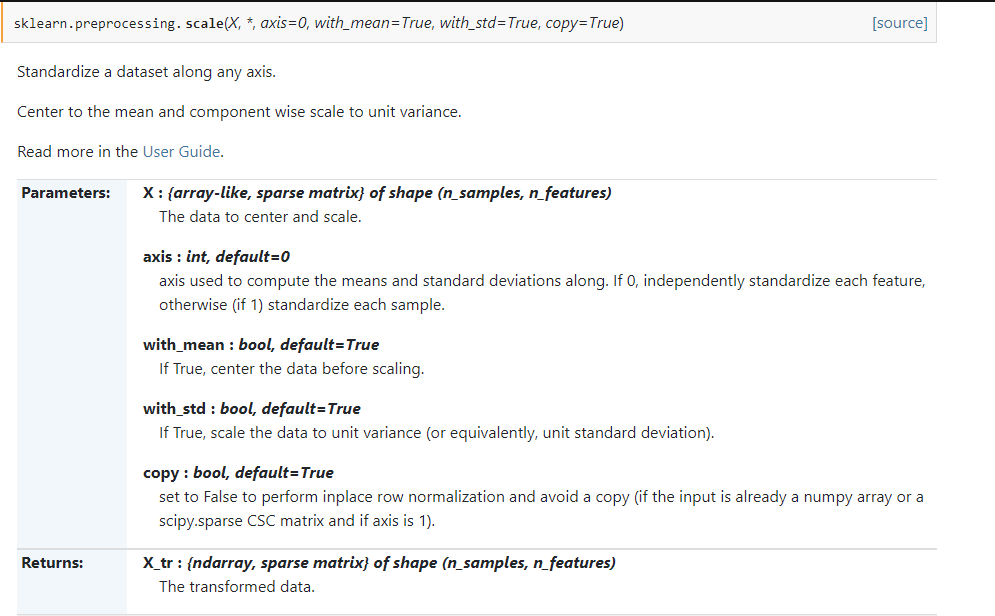

In [ ]:
scaled = preprocessing.scale(df)

Here you can see the dataset that is normalized with zero-mean and unit-variance

In [ ]:
scaled

array([[-0.76945294,  0.23648162,  0.64327854, ...,  1.38966708,
         0.92904772, -0.08883983],
       [-0.3372092 , -1.05563171, -0.44776456, ...,  0.17960193,
        -1.18555885, -0.35330593],
       [-0.31466209, -0.63040605,  0.03234549, ...,  0.70294335,
         0.14081448, -0.87728171],
       ...,
       [-0.38180548, -1.05246099, -3.43710653, ..., -0.11956457,
         0.1175073 , -1.28193232],
       [ 1.91672977, -1.5847247 ,  1.89013292, ...,  0.6278864 ,
        -1.41140105, -1.87223471],
       [ 0.23008769,  2.06324196, -0.18828286, ..., -0.14195884,
         1.79826771, -0.5663782 ]])

# Euclidean Distance Metric

## 2 and 3) Apply K-means and K between 1-15, Report WSS

For each k value, we will initialise k-means and use the inertia to identify the sum of squared distances of samples to the nearest cluster centre. You can also see the WSS values as well.

In [ ]:
WSS = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    labels = km.labels_
    WSS.append(km.inertia_)

WSS

[2400.0,
 2003.1097725953355,
 1822.344254277449,
 1655.4244530694486,
 1496.0201710912415,
 1406.3159591205601,
 1327.0514340795207,
 1260.4276834379743,
 1198.7864889891862,
 1156.5432880065841,
 1107.8244679387974,
 1071.7598346238156,
 1042.3292645384183,
 1005.8031352316389]

3) Best Fitting K-Value

As you can see in the figure below, after K=5 , reduction in total distance changes more slowly and the slope of the line significantly decreased. From this figure, we can infer that going beyond this K value(5) will not contribute much to our clustering algorithm and will only make our clusters more complicated. Therefore, our optimal k-value is 5.

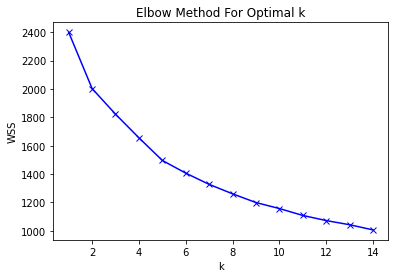

In [ ]:
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# Cosine Similarity Metric

## 2 and 3) Apply K-means and K between 1-15, Report WSS

For each k value, we will initialise k-means and use the inertia to identify the sum of squared distances of samples to the nearest cluster centre. You can also see the WSS values as well.

In [ ]:
WSS = []
K = range(1,15)
for k in K:
    km = KMedoids(n_clusters=k, metric="cosine")
    km = km.fit(scaled)
    WSS.append(km.inertia_)

WSS

[288.242970310129,
 189.5839212478348,
 165.68308920594598,
 148.56757480024038,
 128.65777265237813,
 118.61246071483353,
 115.6873751909107,
 111.35304898042251,
 102.52333696062567,
 96.10463645382804,
 91.93472052318718,
 89.45889094030024,
 87.25874166929518,
 85.93042749442456]

3) Best Fitting K-Value

Our optimal k-value in this case is K=5 again.

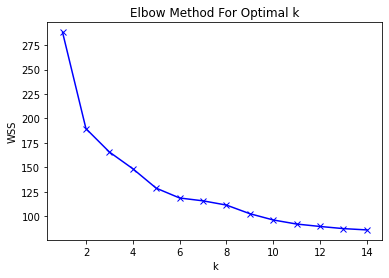

In [ ]:
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# 5) Conclusion

In conclusion, I researched about which packages to use for normalizing with unit-variance and zero-mean. I found out that scale() does exactly that by default.

Afterwards, I used KMeans, Kmeans uses "Euclidean" metric. However sklearn's KMeans doesn't have "Cosine" Metric, therefore I had to find another package for this reason. I found out about KMedoids, which lets me use "Cosine" as a metric. 

I gave the models a range between k=1 and k=15, and to see which k is better, I ran a loop and tried them all. In each increment, I got their WSS value by using interia. Thanks to WSS, I plotted a graph and used the Elbow Technique to see what k value is the optimal approximately. 